In [29]:
import pandas as pd
import numpy as np
from scipy.io import arff
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import scipy

In [2]:
os.getcwd()

'D:\\Pranav\\UPenn\\CIS520\\cis520_project\\WISDM_Health_Monitoring'

In [3]:
ls = os.listdir('wisdm-dataset/arff_files/phone/gyro')

In [4]:
print(len(ls))
ls.pop(0)
print(len(ls))
ls

51
50


['data_1600_gyro_phone.arff',
 'data_1601_gyro_phone.arff',
 'data_1602_gyro_phone.arff',
 'data_1603_gyro_phone.arff',
 'data_1604_gyro_phone.arff',
 'data_1605_gyro_phone.arff',
 'data_1606_gyro_phone.arff',
 'data_1607_gyro_phone.arff',
 'data_1608_gyro_phone.arff',
 'data_1609_gyro_phone.arff',
 'data_1610_gyro_phone.arff',
 'data_1611_gyro_phone.arff',
 'data_1612_gyro_phone.arff',
 'data_1613_gyro_phone.arff',
 'data_1615_gyro_phone.arff',
 'data_1616_gyro_phone.arff',
 'data_1617_gyro_phone.arff',
 'data_1618_gyro_phone.arff',
 'data_1619_gyro_phone.arff',
 'data_1620_gyro_phone.arff',
 'data_1621_gyro_phone.arff',
 'data_1622_gyro_phone.arff',
 'data_1623_gyro_phone.arff',
 'data_1624_gyro_phone.arff',
 'data_1625_gyro_phone.arff',
 'data_1626_gyro_phone.arff',
 'data_1627_gyro_phone.arff',
 'data_1628_gyro_phone.arff',
 'data_1629_gyro_phone.arff',
 'data_1630_gyro_phone.arff',
 'data_1631_gyro_phone.arff',
 'data_1632_gyro_phone.arff',
 'data_1633_gyro_phone.arff',
 'data_163

In [5]:
phone_gyro_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/phone/gyro')
filenames.pop(0)
for file in filenames:
    path = "wisdm-dataset/arff_files/phone/gyro/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, phone_gyro_df]
    phone_gyro_df = pd.concat(frames, sort = False)

for file at wisdm-dataset/arff_files/phone/gyro/data_1600_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1601_gyro_phone.arffshape is: (405, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1602_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1603_gyro_phone.arffshape is: (405, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1604_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1605_gyro_phone.arffshape is: (405, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1606_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1607_gyro_phone.arffshape is: (383, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1608_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1609_gyro_phone.arffshape is: (304, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1610_gyro_phone.a

In [6]:
phone_gyro_df.shape

(17281, 93)

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
phone_gyro_df.describe()

,"""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""","""X9""","""Y0""","""Y1""","""Y2""","""Y3""","""Y4""","""Y5""","""Y6""","""Y7""","""Y8""","""Y9""","""Z0""","""Z1""","""Z2""","""Z3""","""Z4""","""Z5""","""Z6""","""Z7""","""Z8""","""Z9""","""XAVG""","""YAVG""","""ZAVG""","""XPEAK""","""YPEAK""","""ZPEAK""","""XABSOLDEV""","""YABSOLDEV""","""ZABSOLDEV""","""XSTANDDEV""","""YSTANDDEV""","""ZSTANDDEV""","""XVAR""","""YVAR""","""ZVAR""","""XMFCC0""","""XMFCC1""","""XMFCC2""","""XMFCC3""","""XMFCC4""","""XMFCC5""","""XMFCC6""","""XMFCC7""","""XMFCC8""","""XMFCC9""","""XMFCC10""","""XMFCC11""","""XMFCC12""","""YMFCC0""","""YMFCC1""","""YMFCC2""","""YMFCC3""","""YMFCC4""","""YMFCC5""","""YMFCC6""","""YMFCC7""","""YMFCC8""","""YMFCC9""","""YMFCC10""","""YMFCC11""","""YMFCC12""","""ZMFCC0""","""ZMFCC1""","""ZMFCC2""","""ZMFCC3""","""ZMFCC4""","""ZMFCC5""","""ZMFCC6""","""ZMFCC7""","""ZMFCC8""","""ZMFCC9""","""ZMFCC10""","""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT"""
count,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.00000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.0,1.728100e+04,17281.000000,17281.000000,17281.000000,17281.000000,17281.00000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000
mean,0.014061,0.508080,0.464793,0.011321,0.001292,0.000317,0.000088,0.000035,0.000008,0.000005,0.014556,0.500710,0.470470,0.011386,0.001985,0.000597,0.000200,0.000065,0.000021,0.00001,0.007778,0.524075,0.460273,0.006886,0.000866,0.000108,0.000012,0.000002,0.0,2.893351e-07,-0.004277,-0.005565,-0.001560,52.296972,48.85965,54.260928,0.347144,0.373392,0.253197,0.032575,0.035509,0.023822,0.133262,0.140173,0.113731,-0.105892,-0.149673,-0.149433,-0.149033,-0.148472,-0.147753,-0.146876,-0.145842,-0.144651,-0.143305,-0.141806,-0.140155,-0.138354,-0.081025,-0.114526,-0.114342,-0.114035,-0.113607,-0.113056,-0.112385,-0.111594,-0.110682,-0.109653,-0.108506,-0.107243,-0.105864,-0.144384,-0.204081,-0.203753,-0.203207,-0.202443,-0.201463,-0.200267,-0.198856,-0.197232,-0.195398,-0.193354,-0.191103,-0.188647,0.028554,0.044537,0.013204,-0.003585,0.006008,-0.011096,0.662361
std,0.042201,0.170496,0.166467,0.032282,0.007797,0.003040,0.001272,0.000667,0.000231,0.000194,0.043997,0.125138,0.121696,0.031625,0.009846,0.004782,0.002697,0.001208,0.000503,0.00041,0.032031,0.136630,0.132213,0.028827,0.006856,0.001495,0.000316,0.000093,0.0,3.803519e-05,0.061710,0.097895,0.065600,21.924386,14.15082,21.638999,0.557285,0.616637,0.450319,0.050367,0.056566,0.040306,0.121725,0.125941,0.104344,0.298186,0.421472,0.420795,0.419668,0.418091,0.416066,0.413595,0.410682,0.407329,0.403540,0.399319,0.394670,0.389598,0.293275,0.414531,0.413865,0.412756,0.411205,0.409214,0.406784,0.403919,0.400621,0.396894,0.392742,0.388170,0.383182,0.280246,0.396115,0.395479,0.394419,0.392937,0.391034,0.388712,0.385974,0.382823,0.379262,0.375294,0.370925,0.366159,0.448761,0.487646,0.413064,0.448105,0.480076,0.410206,1.044558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [9]:
phone_accel_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/phone/accel')
filenames.pop(0)
for file in filenames:
    path = "wisdm-dataset/arff_files/phone/accel/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, phone_accel_df]
    phone_accel_df = pd.concat(frames, sort = False)

for file at wisdm-dataset/arff_files/phone/accel/data_1600_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1601_accel_phone.arffshape is: (407, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1602_accel_phone.arffshape is: (424, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1603_accel_phone.arffshape is: (409, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1604_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1605_accel_phone.arffshape is: (406, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1606_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1607_accel_phone.arffshape is: (383, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1608_accel_phone.arffshape is: (482, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1609_accel_phone.arffshape is: (306, 93)
for file at wisdm-dataset/arff_files/phone/accel/d

In [10]:
phone_accel_df.shape

(23074, 93)

In [11]:
watch_accel_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/watch/accel')
filenames.pop(0)
for file in filenames:
    path = "wisdm-dataset/arff_files/watch/accel/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, watch_accel_df]
    watch_accel_df = pd.concat(frames, sort = False)
    
print(watch_accel_df.shape)

for file at wisdm-dataset/arff_files/watch/accel/data_1600_accel_watch.arffshape is: (327, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1601_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1602_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1603_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1604_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1605_accel_watch.arffshape is: (330, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1606_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1607_accel_watch.arffshape is: (329, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1608_accel_watch.arffshape is: (340, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1609_accel_watch.arffshape is: (348, 93)
for file at wisdm-dataset/arff_files/watch/accel/d

In [12]:
watch_gyro_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/watch/gyro')
filenames.pop(0)
for file in filenames:
    path = "wisdm-dataset/arff_files/watch/gyro/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, watch_gyro_df]
    watch_gyro_df = pd.concat(frames, sort = False)
    
print(watch_gyro_df.shape)

for file at wisdm-dataset/arff_files/watch/gyro/data_1600_gyro_watch.arffshape is: (327, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1601_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1602_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1603_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1604_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1605_gyro_watch.arffshape is: (330, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1606_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1607_gyro_watch.arffshape is: (329, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1608_gyro_watch.arffshape is: (340, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1609_gyro_watch.arffshape is: (348, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1610_gyro_watch.a

In [13]:
database = pd.DataFrame()
frames_to_merge = [phone_gyro_df, phone_accel_df, watch_gyro_df, watch_accel_df]
database = pd.concat(frames_to_merge, sort = False)
database.shape

(75099, 93)

In [14]:
database.head()

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""","""X9""","""Y0""","""Y1""","""Y2""","""Y3""","""Y4""","""Y5""","""Y6""","""Y7""","""Y8""","""Y9""","""Z0""","""Z1""","""Z2""","""Z3""","""Z4""","""Z5""","""Z6""","""Z7""","""Z8""","""Z9""","""XAVG""","""YAVG""","""ZAVG""","""XPEAK""","""YPEAK""","""ZPEAK""","""XABSOLDEV""","""YABSOLDEV""","""ZABSOLDEV""","""XSTANDDEV""","""YSTANDDEV""","""ZSTANDDEV""","""XVAR""","""YVAR""","""ZVAR""","""XMFCC0""","""XMFCC1""","""XMFCC2""","""XMFCC3""","""XMFCC4""","""XMFCC5""","""XMFCC6""","""XMFCC7""","""XMFCC8""","""XMFCC9""","""XMFCC10""","""XMFCC11""","""XMFCC12""","""YMFCC0""","""YMFCC1""","""YMFCC2""","""YMFCC3""","""YMFCC4""","""YMFCC5""","""YMFCC6""","""YMFCC7""","""YMFCC8""","""YMFCC9""","""YMFCC10""","""YMFCC11""","""YMFCC12""","""ZMFCC0""","""ZMFCC1""","""ZMFCC2""","""ZMFCC3""","""ZMFCC4""","""ZMFCC5""","""ZMFCC6""","""ZMFCC7""","""ZMFCC8""","""ZMFCC9""","""ZMFCC10""","""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,b'A',0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.025,0.375,0.560,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.04,0.390,0.550,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.104353,0.195540,-0.103975,49.0000,50.8108,56.4706,1.03295,0.884363,0.959026,0.102110,0.093037,0.138938,0.319547,0.305019,0.372744,0.297446,0.420427,0.419752,0.418627,0.417054,0.415034,0.412570,0.409664,0.406319,0.402539,0.398328,0.393691,0.388632,0.283711,0.401012,0.400368,0.399295,0.397795,0.395868,0.393518,0.390746,0.387556,0.383951,0.379934,0.375511,0.370686,0.322261,0.455502,0.454770,0.453552,0.451847,0.449659,0.446989,0.443841,0.440217,0.436122,0.431560,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,b'1650'
1,b'A',0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.485,0.515,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.445,0.555,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.004799,-0.017327,0.043612,63.0000,39.1837,46.4286,1.07529,0.636499,0.402756,0.095769,0.056382,0.039600,0.309465,0.237448,0.198998,0.279204,0.394643,0.394009,0.392953,0.391477,0.389581,0.387268,0.384540,0.381400,0.377852,0.373900,0.369547,0.364798,0.230082,0.325211,0.324688,0.323818,0.322601,0.321039,0.319133,0.316885,0.314298,0.311374,0.308117,0.304530,0.300617,0.167250,0.236401,0.236021,0.235389,0.234504,0.233368,0.231983,0.230349,0.228468,0.226343,0.223975,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,b'1650'
2,b'A',0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.460,0.540,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.480,0.520,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.019084,0.047234,-0.007164,54.8571,39.3617,55.2941,1.03300,0.474866,0.317109,0.090256,0.043241,0.028944,0.300426,0.207945,0.170128,0.271020,0.383075,0.382460,0.381435,0.380001,0.378161,0.375916,0.373268,0.370220,0.366776,0.362940,0.358714,0.354105,0.198152,0.280079,0.279629,0.278879,0.277831,0.276486,0.274844,0.272908,0.270680,0.268162,0.265357,0.262268,0.258898,0.121430,0.171636,0.171360,0.170901,0.170259,0.169434,0.168428,0.167242,0.165876,0.164333,0.162614,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,b'1650'
3,b'A',0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.495,0.500,0.005,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.455,0.545,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.127773,0.036970,0.065604,65.0000,41.7021,52.8571,1.01637,0.626790,0.336509,0.089104,0.055862,0.030425,0.298503,0.236351,0.174428,0.255400,0.360997,0.360417,0.359451,0.358100,0.356366,0.354250,0.351755,0.348883,0.345638,0.342022,0.338040,0.333696,0.211214,0.298542,0.298062,0.297263,0.296146,0.294712,0.292962,0.290899,0.288524,0.285840,0.282850,0.279557,0.275964,0.118531,0.167538,0.167269,0.166821,0.166194,0.165389,0.164407,0.163249,0.161916,0.160410,0.158732,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,b'1650'
4,b'A',0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,0.0,0.005,0.490,0.505,0.0

In [15]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75099 entries, 0 to 326
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   "ACTIVITY"   75099 non-null  object 
 1   "X0"         75099 non-null  float64
 2   "X1"         75099 non-null  float64
 3   "X2"         75099 non-null  float64
 4   "X3"         75099 non-null  float64
 5   "X4"         75099 non-null  float64
 6   "X5"         75099 non-null  float64
 7   "X6"         75099 non-null  float64
 8   "X7"         75099 non-null  float64
 9   "X8"         75099 non-null  float64
 10  "X9"         75099 non-null  float64
 11  "Y0"         75099 non-null  float64
 12  "Y1"         75099 non-null  float64
 13  "Y2"         75099 non-null  float64
 14  "Y3"         75099 non-null  float64
 15  "Y4"         75099 non-null  float64
 16  "Y5"         75099 non-null  float64
 17  "Y6"         75099 non-null  float64
 18  "Y7"         75099 non-null  float64
 19  "Y8"  

In [23]:
old_column_names = database.columns

In [24]:
new_column_names = []
for name in old_column_names:
    new_column_names.append(name.replace('"', ''))

In [25]:
new_column_names

['ACTIVITY',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'Y0',
 'Y1',
 'Y2',
 'Y3',
 'Y4',
 'Y5',
 'Y6',
 'Y7',
 'Y8',
 'Y9',
 'Z0',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'Z6',
 'Z7',
 'Z8',
 'Z9',
 'XAVG',
 'YAVG',
 'ZAVG',
 'XPEAK',
 'YPEAK',
 'ZPEAK',
 'XABSOLDEV',
 'YABSOLDEV',
 'ZABSOLDEV',
 'XSTANDDEV',
 'YSTANDDEV',
 'ZSTANDDEV',
 'XVAR',
 'YVAR',
 'ZVAR',
 'XMFCC0',
 'XMFCC1',
 'XMFCC2',
 'XMFCC3',
 'XMFCC4',
 'XMFCC5',
 'XMFCC6',
 'XMFCC7',
 'XMFCC8',
 'XMFCC9',
 'XMFCC10',
 'XMFCC11',
 'XMFCC12',
 'YMFCC0',
 'YMFCC1',
 'YMFCC2',
 'YMFCC3',
 'YMFCC4',
 'YMFCC5',
 'YMFCC6',
 'YMFCC7',
 'YMFCC8',
 'YMFCC9',
 'YMFCC10',
 'YMFCC11',
 'YMFCC12',
 'ZMFCC0',
 'ZMFCC1',
 'ZMFCC2',
 'ZMFCC3',
 'ZMFCC4',
 'ZMFCC5',
 'ZMFCC6',
 'ZMFCC7',
 'ZMFCC8',
 'ZMFCC9',
 'ZMFCC10',
 'ZMFCC11',
 'ZMFCC12',
 'XYCOS',
 'XZCOS',
 'YZCOS',
 'XYCOR',
 'XZCOR',
 'YZCOR',
 'RESULTANT',
 'class']

In [26]:
replacement_dict = dict(zip(old_column_names, new_column_names))
replacement_dict

{'"ACTIVITY"': 'ACTIVITY',
 '"X0"': 'X0',
 '"X1"': 'X1',
 '"X2"': 'X2',
 '"X3"': 'X3',
 '"X4"': 'X4',
 '"X5"': 'X5',
 '"X6"': 'X6',
 '"X7"': 'X7',
 '"X8"': 'X8',
 '"X9"': 'X9',
 '"Y0"': 'Y0',
 '"Y1"': 'Y1',
 '"Y2"': 'Y2',
 '"Y3"': 'Y3',
 '"Y4"': 'Y4',
 '"Y5"': 'Y5',
 '"Y6"': 'Y6',
 '"Y7"': 'Y7',
 '"Y8"': 'Y8',
 '"Y9"': 'Y9',
 '"Z0"': 'Z0',
 '"Z1"': 'Z1',
 '"Z2"': 'Z2',
 '"Z3"': 'Z3',
 '"Z4"': 'Z4',
 '"Z5"': 'Z5',
 '"Z6"': 'Z6',
 '"Z7"': 'Z7',
 '"Z8"': 'Z8',
 '"Z9"': 'Z9',
 '"XAVG"': 'XAVG',
 '"YAVG"': 'YAVG',
 '"ZAVG"': 'ZAVG',
 '"XPEAK"': 'XPEAK',
 '"YPEAK"': 'YPEAK',
 '"ZPEAK"': 'ZPEAK',
 '"XABSOLDEV"': 'XABSOLDEV',
 '"YABSOLDEV"': 'YABSOLDEV',
 '"ZABSOLDEV"': 'ZABSOLDEV',
 '"XSTANDDEV"': 'XSTANDDEV',
 '"YSTANDDEV"': 'YSTANDDEV',
 '"ZSTANDDEV"': 'ZSTANDDEV',
 '"XVAR"': 'XVAR',
 '"YVAR"': 'YVAR',
 '"ZVAR"': 'ZVAR',
 '"XMFCC0"': 'XMFCC0',
 '"XMFCC1"': 'XMFCC1',
 '"XMFCC2"': 'XMFCC2',
 '"XMFCC3"': 'XMFCC3',
 '"XMFCC4"': 'XMFCC4',
 '"XMFCC5"': 'XMFCC5',
 '"XMFCC6"': 'XMFCC6',
 '"XMFCC7"'

In [27]:
database = database.rename(columns = replacement_dict)
database.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,b'A',0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.025,0.375,0.560,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.04,0.390,0.550,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.104353,0.195540,-0.103975,49.0000,50.8108,56.4706,1.03295,0.884363,0.959026,0.102110,0.093037,0.138938,0.319547,0.305019,0.372744,0.297446,0.420427,0.419752,0.418627,0.417054,0.415034,0.412570,0.409664,0.406319,0.402539,0.398328,0.393691,0.388632,0.283711,0.401012,0.400368,0.399295,0.397795,0.395868,0.393518,0.390746,0.387556,0.383951,0.379934,0.375511,0.370686,0.322261,0.455502,0.454770,0.453552,0.451847,0.449659,0.446989,0.443841,0.440217,0.436122,0.431560,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,b'1650'
1,b'A',0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.485,0.515,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.445,0.555,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.004799,-0.017327,0.043612,63.0000,39.1837,46.4286,1.07529,0.636499,0.402756,0.095769,0.056382,0.039600,0.309465,0.237448,0.198998,0.279204,0.394643,0.394009,0.392953,0.391477,0.389581,0.387268,0.384540,0.381400,0.377852,0.373900,0.369547,0.364798,0.230082,0.325211,0.324688,0.323818,0.322601,0.321039,0.319133,0.316885,0.314298,0.311374,0.308117,0.304530,0.300617,0.167250,0.236401,0.236021,0.235389,0.234504,0.233368,0.231983,0.230349,0.228468,0.226343,0.223975,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,b'1650'
2,b'A',0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.460,0.540,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.480,0.520,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.019084,0.047234,-0.007164,54.8571,39.3617,55.2941,1.03300,0.474866,0.317109,0.090256,0.043241,0.028944,0.300426,0.207945,0.170128,0.271020,0.383075,0.382460,0.381435,0.380001,0.378161,0.375916,0.373268,0.370220,0.366776,0.362940,0.358714,0.354105,0.198152,0.280079,0.279629,0.278879,0.277831,0.276486,0.274844,0.272908,0.270680,0.268162,0.265357,0.262268,0.258898,0.121430,0.171636,0.171360,0.170901,0.170259,0.169434,0.168428,0.167242,0.165876,0.164333,0.162614,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,b'1650'
3,b'A',0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.495,0.500,0.005,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.455,0.545,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.127773,0.036970,0.065604,65.0000,41.7021,52.8571,1.01637,0.626790,0.336509,0.089104,0.055862,0.030425,0.298503,0.236351,0.174428,0.255400,0.360997,0.360417,0.359451,0.358100,0.356366,0.354250,0.351755,0.348883,0.345638,0.342022,0.338040,0.333696,0.211214,0.298542,0.298062,0.297263,0.296146,0.294712,0.292962,0.290899,0.288524,0.285840,0.282850,0.279557,0.275964,0.118531,0.167538,0.167269,0.166821,0.166194,0.165389,0.164407,0.163249,0.161916,0.160410,0.158732,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,b'1650'
4,b'A',0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,0.0,0.005,0.490,0.505,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.490,0.510,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-0.004405,-0.010882,0.024778,67.5862,37.6471,51.3158,1.08174,0.604068,0.370222,0.096822,0.052086,0.033112,0.311162,0.228224,0.181967,0.270277,0.382024,0.381411,0.380388,0.378959,0.377124,0.374885,0.372244,0.369205,0.365770,0.361944,0.357730,0.353134,0.209769,0.296499,0.296022,0.295229,0.294120,0.292695,0.290957,0.288908,0.286549,0.283884,0.280914,0.277644,0.274076,0.131827,0.186331,0.186032,0.185533,0.184836,0.183941,0.182849,0.181561,0.180078,0.178403,0.176537,0.174482,0.172240,

In [6]:
labelencoder = LabelEncoder()

In [29]:
database['ACTIVITY'] = labelencoder.fit_transform(database['ACTIVITY'])
database.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.025,0.375,0.560,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.04,0.390,0.550,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.104353,0.195540,-0.103975,49.0000,50.8108,56.4706,1.03295,0.884363,0.959026,0.102110,0.093037,0.138938,0.319547,0.305019,0.372744,0.297446,0.420427,0.419752,0.418627,0.417054,0.415034,0.412570,0.409664,0.406319,0.402539,0.398328,0.393691,0.388632,0.283711,0.401012,0.400368,0.399295,0.397795,0.395868,0.393518,0.390746,0.387556,0.383951,0.379934,0.375511,0.370686,0.322261,0.455502,0.454770,0.453552,0.451847,0.449659,0.446989,0.443841,0.440217,0.436122,0.431560,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,b'1650'
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.485,0.515,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.445,0.555,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.004799,-0.017327,0.043612,63.0000,39.1837,46.4286,1.07529,0.636499,0.402756,0.095769,0.056382,0.039600,0.309465,0.237448,0.198998,0.279204,0.394643,0.394009,0.392953,0.391477,0.389581,0.387268,0.384540,0.381400,0.377852,0.373900,0.369547,0.364798,0.230082,0.325211,0.324688,0.323818,0.322601,0.321039,0.319133,0.316885,0.314298,0.311374,0.308117,0.304530,0.300617,0.167250,0.236401,0.236021,0.235389,0.234504,0.233368,0.231983,0.230349,0.228468,0.226343,0.223975,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,b'1650'
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.460,0.540,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.480,0.520,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.019084,0.047234,-0.007164,54.8571,39.3617,55.2941,1.03300,0.474866,0.317109,0.090256,0.043241,0.028944,0.300426,0.207945,0.170128,0.271020,0.383075,0.382460,0.381435,0.380001,0.378161,0.375916,0.373268,0.370220,0.366776,0.362940,0.358714,0.354105,0.198152,0.280079,0.279629,0.278879,0.277831,0.276486,0.274844,0.272908,0.270680,0.268162,0.265357,0.262268,0.258898,0.121430,0.171636,0.171360,0.170901,0.170259,0.169434,0.168428,0.167242,0.165876,0.164333,0.162614,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,b'1650'
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.495,0.500,0.005,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.455,0.545,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.127773,0.036970,0.065604,65.0000,41.7021,52.8571,1.01637,0.626790,0.336509,0.089104,0.055862,0.030425,0.298503,0.236351,0.174428,0.255400,0.360997,0.360417,0.359451,0.358100,0.356366,0.354250,0.351755,0.348883,0.345638,0.342022,0.338040,0.333696,0.211214,0.298542,0.298062,0.297263,0.296146,0.294712,0.292962,0.290899,0.288524,0.285840,0.282850,0.279557,0.275964,0.118531,0.167538,0.167269,0.166821,0.166194,0.165389,0.164407,0.163249,0.161916,0.160410,0.158732,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,b'1650'
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,0.0,0.005,0.490,0.505,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.490,0.510,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-0.004405,-0.010882,0.024778,67.5862,37.6471,51.3158,1.08174,0.604068,0.370222,0.096822,0.052086,0.033112,0.311162,0.228224,0.181967,0.270277,0.382024,0.381411,0.380388,0.378959,0.377124,0.374885,0.372244,0.369205,0.365770,0.361944,0.357730,0.353134,0.209769,0.296499,0.296022,0.295229,0.294120,0.292695,0.290957,0.288908,0.286549,0.283884,0.280914,0.277644,0.274076,0.131827,0.186331,0.186032,0.185533,0.184836,0.183941,0.182849,0.181561,0.180078,0.178403,0.176537,0.174482,0.172240,0.217282,0.5182

In [30]:
database['ACTIVITY'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [31]:
database.pop('class')
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75099 entries, 0 to 326
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ACTIVITY   75099 non-null  int32  
 1   X0         75099 non-null  float64
 2   X1         75099 non-null  float64
 3   X2         75099 non-null  float64
 4   X3         75099 non-null  float64
 5   X4         75099 non-null  float64
 6   X5         75099 non-null  float64
 7   X6         75099 non-null  float64
 8   X7         75099 non-null  float64
 9   X8         75099 non-null  float64
 10  X9         75099 non-null  float64
 11  Y0         75099 non-null  float64
 12  Y1         75099 non-null  float64
 13  Y2         75099 non-null  float64
 14  Y3         75099 non-null  float64
 15  Y4         75099 non-null  float64
 16  Y5         75099 non-null  float64
 17  Y6         75099 non-null  float64
 18  Y7         75099 non-null  float64
 19  Y8         75099 non-null  float64
 20  Y9      

In [20]:
from sklearn.utils import shuffle
database_shuffle = shuffle(database)

NameError: name 'database' is not defined

In [36]:
database.head(20)

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.025,0.375,0.560,0.030,0.010,0.000,0.0,0.0,0.0,0.0,0.040,0.390,0.550,0.020,0.00,0.000,0.0,0.0,0.0,0.0,0.104353,0.195540,-0.103975,49.0000,50.8108,56.4706,1.032950,0.884363,0.959026,0.102110,0.093037,0.138938,0.319547,0.305019,0.372744,0.297446,0.420427,0.419752,0.418627,0.417054,0.415034,0.412570,0.409664,0.406319,0.402539,0.398328,0.393691,0.388632,0.283711,0.401012,0.400368,0.399295,0.397795,0.395868,0.393518,0.390746,0.387556,0.383951,0.379934,0.375511,0.370686,0.322261,0.455502,0.454770,0.453552,0.451847,0.449659,0.446989,0.443841,0.440217,0.436122,0.431560,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.485,0.515,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.445,0.555,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.004799,-0.017327,0.043612,63.0000,39.1837,46.4286,1.075290,0.636499,0.402756,0.095769,0.056382,0.039600,0.309465,0.237448,0.198998,0.279204,0.394643,0.394009,0.392953,0.391477,0.389581,0.387268,0.384540,0.381400,0.377852,0.373900,0.369547,0.364798,0.230082,0.325211,0.324688,0.323818,0.322601,0.321039,0.319133,0.316885,0.314298,0.311374,0.308117,0.304530,0.300617,0.167250,0.236401,0.236021,0.235389,0.234504,0.233368,0.231983,0.230349,0.228468,0.226343,0.223975,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.460,0.540,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.480,0.520,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.019084,0.047234,-0.007164,54.8571,39.3617,55.2941,1.033000,0.474866,0.317109,0.090256,0.043241,0.028944,0.300426,0.207945,0.170128,0.271020,0.383075,0.382460,0.381435,0.380001,0.378161,0.375916,0.373268,0.370220,0.366776,0.362940,0.358714,0.354105,0.198152,0.280079,0.279629,0.278879,0.277831,0.276486,0.274844,0.272908,0.270680,0.268162,0.265357,0.262268,0.258898,0.121430,0.171636,0.171360,0.170901,0.170259,0.169434,0.168428,0.167242,0.165876,0.164333,0.162614,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.495,0.500,0.005,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.455,0.545,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.127773,0.036970,0.065604,65.0000,41.7021,52.8571,1.016370,0.626790,0.336509,0.089104,0.055862,0.030425,0.298503,0.236351,0.174428,0.255400,0.360997,0.360417,0.359451,0.358100,0.356366,0.354250,0.351755,0.348883,0.345638,0.342022,0.338040,0.333696,0.211214,0.298542,0.298062,0.297263,0.296146,0.294712,0.292962,0.290899,0.288524,0.285840,0.282850,0.279557,0.275964,0.118531,0.167538,0.167269,0.166821,0.166194,0.165389,0.164407,0.163249,0.161916,0.160410,0.158732,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,0.0,0.005,0.490,0.505,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.490,0.510,0.000,0.00,0.000,0.0,0.0,0.0,0.0,-0.004405,-0.010882,0.024778,67.5862,37.6471,51.3158,1.081740,0.604068,0.370222,0.096822,0.052086,0.033112,0.311162,0.228224,0.181967,0.270277,0.382024,0.381411,0.380388,0.378959,0.377124,0.374885,0.372244,0.369205,0.365770,0.361944,0.357730,0.353134,0.209769,0.296499,0.296022,0.295229,0.294120,0.292695,0.290957,0.288908,0.286549,0.283884,0.280914,0.277644,0.274076,0.131827,0.186331,0.186032,0.185533,0.184836,0.183941,0.182849,0.181561,0.180078,0.178403,0.176537,0.174482,0.172240,0.217282

In [35]:
database_shuffle.head(20)

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
155,8,0.000,0.000,0.000,0.000,1.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.105,0.895,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.00,6.385600,5.160020,4.386710,41.5556,49.2308,43.8636,0.110797,0.112166,0.090384,0.010650,0.011407,0.008962,0.103197,0.106803,0.094667,0.281859,0.398396,0.397756,0.396690,0.395199,0.393285,0.390950,0.388197,0.385027,0.381445,0.377455,0.373061,0.368267,0.253824,0.358769,0.358193,0.357233,0.355891,0.354167,0.352064,0.349584,0.346730,0.343505,0.339911,0.335954,0.331637,0.230871,0.326327,0.325802,0.324929,0.323708,0.322140,0.320228,0.317972,0.315376,0.312442,0.309174,0.305575,0.301648,0.999208,0.998881,0.998687,-0.034676,-0.622611,-0.451375,9.311320
62,2,0.110,0.305,0.505,0.080,0.000,0.000,0.00,0.000,0.000,0.000,0.055,0.480,0.430,0.035,0.000,0.000,0.0,0.0,0.0,0.0,0.005,0.385,0.605,0.005,0.000,0.000,0.000,0.000,0.000,0.00,0.078648,-0.284500,-0.083767,42.3256,38.6000,53.4286,1.529420,1.135580,0.793217,0.126919,0.103348,0.070762,0.356257,0.321478,0.266012,0.279595,0.395195,0.394560,0.393503,0.392024,0.390125,0.387809,0.385078,0.381934,0.378381,0.374423,0.370064,0.365308,0.302560,0.427655,0.426968,0.425824,0.424224,0.422169,0.419663,0.416707,0.413304,0.409460,0.405177,0.400459,0.395314,0.198831,0.281039,0.280587,0.279835,0.278783,0.277433,0.275786,0.273844,0.271608,0.269081,0.266266,0.263167,0.259785,0.288363,0.761139,0.289614,0.302586,0.768202,0.279788,2.267570
558,14,0.995,0.005,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.005,0.095,0.730,0.135,0.015,0.005,0.005,0.005,0.005,0.00,-6.968980,-6.908030,1.573330,74.8000,86.3636,62.9032,1.074420,1.048660,1.240780,0.106761,0.093114,0.166436,0.326743,0.305146,0.407966,0.363014,0.513105,0.512281,0.510908,0.508988,0.506523,0.503516,0.499969,0.495887,0.491274,0.486135,0.480475,0.474301,0.336532,0.475674,0.474909,0.473637,0.471857,0.469572,0.466784,0.463496,0.459711,0.455435,0.450671,0.445424,0.439700,0.395391,0.558868,0.557970,0.556475,0.554383,0.551699,0.548423,0.544560,0.540114,0.535090,0.529492,0.523328,0.516603,0.947587,-0.619567,-0.606355,-0.314084,-0.434296,-0.388419,10.252900
158,8,0.000,0.510,0.490,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.575,0.425,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.470,0.530,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.003051,0.002438,0.000981,37.4510,35.1852,34.0000,0.095805,0.040881,0.059319,0.011940,0.005241,0.007503,0.109272,0.072392,0.086622,0.011671,0.016496,0.016470,0.016425,0.016364,0.016285,0.016188,0.016074,0.015943,0.015794,0.015629,0.015447,0.015249,-0.106572,-0.150636,-0.150394,-0.149990,-0.149427,-0.148703,-0.147820,-0.146779,-0.145581,-0.144226,-0.142718,-0.141056,-0.139244,-0.081217,-0.114796,-0.114612,-0.114304,-0.113875,-0.113323,-0.112651,-0.111857,-0.110944,-0.109912,-0.108762,-0.107496,-0.106115,0.315724,-0.418463,0.234595,0.315352,-0.418717,0.234427,0.134132
54,1,0.525,0.100,0.080,0.080,0.085,0.075,0.02,0.015,0.010,0.010,0.655,0.080,0.100,0.100,0.040,0.025,0.0,0.0,0.0,0.0,0.330,0.105,0.125,0.175,0.130,0.045,0.035,0.030,0.015,0.01,-2.298010,-10.991900,0.449521,59.3939,97.5000,38.7755,6.512550,10.969400,5.941300,0.553891,0.905691,0.523118,0.744238,0.951678,0.723269,0.528429,0.746911,0.745711,0.743712,0.740918,0.737329,0.732952,0.727789,0.721847,0.715132,0.707651,0.699413,0.690425,0.556587,0.786711,0.785447,0.783342,0.780399,0.776619,0.772008,0.766570,0.760312,0.753239,0.745360,0.736682

In [37]:
numpy_data_shuffle = database_shuffle.to_numpy()

In [38]:
numpy_data_shuffle.shape

(75099, 92)

In [26]:
numpy_data = database.to_numpy()

In [27]:
numpy_data.shape

(75099, 92)

In [39]:
X = numpy_data_shuffle[:,1:]
Y = numpy_data_shuffle[:,0]
print(X.shape)
print(Y.shape)

(75099, 91)
(75099,)


In [40]:
Y[400:2000]

array([ 6., 10.,  3., ...,  2.,  0., 16.])

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [42]:
x_train.shape

(60079, 91)

In [43]:
y_train.shape

(60079,)

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred_test = gnb.predict(x_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred_test)

In [45]:
print(acc)

0.1926098535286285


In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.8)
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

from sklearn.metrics import accuracy_score


acc1 = accuracy_score(y_test,y_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [47]:
print(acc1)

0.20486018641810919


In [48]:
from sklearn.preprocessing import StandardScaler
x_pca = StandardScaler().fit_transform(X) # normalizing the features

In [46]:
from sklearn.decomposition import PCA

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

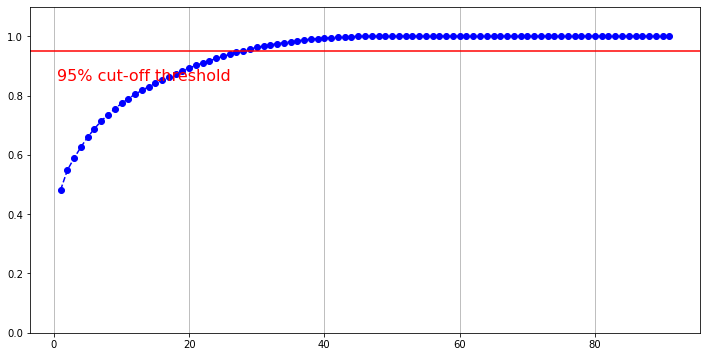

In [51]:
pca = PCA().fit(x_pca)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 92, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()

In [52]:
pca = PCA(n_components = 28)
pca.fit(x_train)

PCA(n_components=28)

In [53]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [54]:
logreg2 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.4, n_jobs = 2)
logreg2.fit(x_train_pca,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(l1_ratio=0.4, multi_class='multinomial', n_jobs=2,
                   penalty='elasticnet', solver='saga')

In [55]:
y_pred = logreg2.predict(x_test_pca)


acc2 = accuracy_score(y_test,y_pred)

print(acc2)

0.22876165113182423


In [56]:

logreg3 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.9, n_jobs = 2)
logreg3.fit(x_train_pca,y_train)

y_pred = logreg3.predict(x_test_pca)


acc3 = accuracy_score(y_test,y_pred)

print(acc3)

0.22836218375499334


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Only phone_gyro data

In [66]:
phone_gyro_df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,...,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,49
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,...,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,49
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,...,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,49
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,...,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,49
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,...,0.174482,0.172240,0.217282,0.518276,0.025885,0.217259,0.519174,0.026706,1.43085,49


In [67]:
phone_gyro_old_column_names = phone_gyro_df.columns

In [68]:
phone_gyro_new_column_names = []
for name in phone_gyro_old_column_names:
    phone_gyro_new_column_names.append(name.replace('"', ''))

In [69]:
phone_gyro_new_column_names

['ACTIVITY',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'Y0',
 'Y1',
 'Y2',
 'Y3',
 'Y4',
 'Y5',
 'Y6',
 'Y7',
 'Y8',
 'Y9',
 'Z0',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'Z6',
 'Z7',
 'Z8',
 'Z9',
 'XAVG',
 'YAVG',
 'ZAVG',
 'XPEAK',
 'YPEAK',
 'ZPEAK',
 'XABSOLDEV',
 'YABSOLDEV',
 'ZABSOLDEV',
 'XSTANDDEV',
 'YSTANDDEV',
 'ZSTANDDEV',
 'XVAR',
 'YVAR',
 'ZVAR',
 'XMFCC0',
 'XMFCC1',
 'XMFCC2',
 'XMFCC3',
 'XMFCC4',
 'XMFCC5',
 'XMFCC6',
 'XMFCC7',
 'XMFCC8',
 'XMFCC9',
 'XMFCC10',
 'XMFCC11',
 'XMFCC12',
 'YMFCC0',
 'YMFCC1',
 'YMFCC2',
 'YMFCC3',
 'YMFCC4',
 'YMFCC5',
 'YMFCC6',
 'YMFCC7',
 'YMFCC8',
 'YMFCC9',
 'YMFCC10',
 'YMFCC11',
 'YMFCC12',
 'ZMFCC0',
 'ZMFCC1',
 'ZMFCC2',
 'ZMFCC3',
 'ZMFCC4',
 'ZMFCC5',
 'ZMFCC6',
 'ZMFCC7',
 'ZMFCC8',
 'ZMFCC9',
 'ZMFCC10',
 'ZMFCC11',
 'ZMFCC12',
 'XYCOS',
 'XZCOS',
 'YZCOS',
 'XYCOR',
 'XZCOR',
 'YZCOR',
 'RESULTANT',
 'class']

In [70]:
replacement_dict = dict(zip(phone_gyro_old_column_names, phone_gyro_new_column_names))
phone_gyro_df = phone_gyro_df.rename(columns = replacement_dict)
phone_gyro_df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,...,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,49
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,...,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,49
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,...,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,49
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,...,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,49
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,...,0.174482,0.172240,0.217282,0.518276,0.025885,0.217259,0.519174,0.026706,1.43085,49


In [71]:
phone_gyro_df['ACTIVITY'] = labelencoder.fit_transform(phone_gyro_df['ACTIVITY'])
phone_gyro_df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,...,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,49
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,...,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,49
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,...,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,49
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,...,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,49
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,...,0.174482,0.172240,0.217282,0.518276,0.025885,0.217259,0.519174,0.026706,1.43085,49


In [72]:
phone_gyro_df['class'] = labelencoder.fit_transform(phone_gyro_df['class'])
phone_gyro_df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,...,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,49
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,...,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,49
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,...,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,49
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,...,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,49
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,...,0.174482,0.172240,0.217282,0.518276,0.025885,0.217259,0.519174,0.026706,1.43085,49


In [73]:
phone_gyro_df['class'].unique()

array([49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
      dtype=int64)

In [74]:
phone_gyro_df['ACTIVITY'].value_counts()

3     984
16    978
10    976
7     974
14    972
12    971
17    970
4     969
1     966
9     959
6     954
11    949
15    948
8     947
2     946
13    944
5     938
0     936
Name: ACTIVITY, dtype: int64

In [75]:
phone_gyro_df['class'].value_counts()

48    406
18    405
5     405
46    405
1     405
13    405
20    405
3     405
47    401
45    401
44    401
49    401
7     383
40    379
42    379
43    379
41    357
25    347
39    324
38    324
36    323
37    323
34    322
21    321
2     321
19    321
35    321
4     321
33    321
32    321
16    321
23    321
6     321
11    321
30    321
14    321
29    321
28    321
12    321
22    321
27    321
26    321
10    321
24    321
8     321
31    321
0     321
9     304
17    303
15    285
Name: class, dtype: int64

In [76]:
phone_gyro_df.groupby(["ACTIVITY","class"])['ACTIVITY'].count()

ACTIVITY  class
0         0        17
          1        22
          2        17
          3        22
          4        17
                   ..
17        45       22
          46       22
          47       22
          48       23
          49       22
Name: ACTIVITY, Length: 890, dtype: int64

In [18]:
#phone_gyro_df.pop('class')
#phone_gyro_df.info()

In [21]:
from sklearn.utils import shuffle

In [77]:
phone_gyro_df_shuffle = shuffle(phone_gyro_df)

In [78]:
phone_gyro_df_shuffle.head(10)

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
313,13,0.000,0.555,0.445,0.000,0.00,0.0,0.0,0.0,0.0,...,0.016912,0.016695,-0.300460,0.171839,0.066663,-0.300370,0.168181,0.068406,0.561112,46
208,9,0.000,0.970,0.030,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.598148,-0.590461,0.270962,0.841988,-0.072933,-0.565803,0.595759,-0.848562,0.019056,1
304,14,0.000,0.500,0.500,0.000,0.00,0.0,0.0,0.0,0.0,...,0.025569,0.025240,-0.402234,0.555304,-0.052161,-0.401965,0.556946,-0.047949,0.402931,43
59,2,0.145,0.320,0.370,0.135,0.03,0.0,0.0,0.0,0.0,...,0.276901,0.273343,-0.085548,-0.517667,0.105096,-0.085787,-0.525353,0.105330,2.711560,40
65,2,0.000,0.600,0.400,0.000,0.00,0.0,0.0,0.0,0.0,...,0.180898,0.178573,-0.439552,-0.519429,-0.273357,-0.439840,-0.549767,-0.221947,1.286250,25
233,13,0.000,0.515,0.485,0.000,0.00,0.0,0.0,0.0,0.0,...,0.091702,0.090524,-0.271222,-0.280330,0.662909,-0.271570,-0.280519,0.662740,0.707905,26
121,5,0.000,0.475,0.525,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.185368,-0.182986,0.194136,-0.464338,-0.806394,0.196048,-0.466453,-0.805578,0.098668,45
88,3,0.000,0.260,0.740,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.498643,-0.492236,-0.939013,-0.884677,0.865423,-0.938136,-0.896382,0.866970,0.021220,25
279,15,0.000,0.345,0.655,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.307979,-0.304022,-0.538338,0.543805,-0.596141,-0.543098,0.540368,-0.594735,0.050048,26
140,7,0.000,0.460,0.540,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.526324,-0.519561,0.660269,-0.296424,0.399093,0.659999,-0.299981,0.398431,0.013355,11


In [79]:
np_data_phone_gyro = phone_gyro_df_shuffle.to_numpy()
X = np_data_phone_gyro[:,1:]
Y = np_data_phone_gyro[:,0]
print(X.shape)
print(Y.shape)

(17281, 92)
(17281,)


In [83]:
x_sparse = scipy.sparse.csr_matrix(X)

In [84]:
x_sparse

<17281x92 sparse matrix of type '<class 'numpy.float64'>'
	with 1198262 stored elements in Compressed Sparse Row format>

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean = False).fit(x_sparse)
x_sparse_scaled = scaler.transform(x_sparse)
x_sparse_scaled

<17281x92 sparse matrix of type '<class 'numpy.float64'>'
	with 1198262 stored elements in Compressed Sparse Row format>

In [86]:
from sklearn.model_selection import train_test_split
x_train_sparse,x_test_sparse,y_train,y_test = train_test_split(x_sparse_scaled,Y,test_size=0.2)

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [44]:
from sklearn.linear_model import LogisticRegression

logreg4 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.3, max_iter = 200, n_jobs = 6)
logreg4.fit(x_train_sparse,y_train)

y_pred = logreg4.predict(x_test_sparse)

from sklearn.metrics import accuracy_score
y_train_pred = logreg4.predict(x_train_sparse)
train_acc = accuracy_score(y_train, y_train_pred)
acc4 = accuracy_score(y_test,y_pred)

print(train_acc)
print(acc4)

0.3101128472222222
0.3144344807636679


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [48]:
from sklearn.preprocessing import StandardScaler
x_pca = StandardScaler().fit_transform(X) # normalizing the features

pca = PCA().fit(x_sparse_scaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 93, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [96]:
pca = PCA(n_components = 40)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [98]:
logreg5 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.5, n_jobs = 2)
logreg5.fit(x_train_pca,y_train)

y_pred = logreg5.predict(x_test_pca)


acc5 = accuracy_score(y_test,y_pred)

print(acc5)

0.19814868382991033


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [88]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, n_jobs = 2)
clf.fit(x_train_sparse, y_train)

y_pred = clf.predict(x_test_sparse)

y_pred_train = clf.predict(x_train_sparse)

train_acc = accuracy_score(y_train, y_pred_train)

acc = accuracy_score(y_test, y_pred)

print(train_acc)
print(acc)

1.0
0.5597338733005496


### hyper opt

In [27]:
#pip install hyperopt

In [56]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [49]:
space = {
    "n_estimators": hp.quniform("n_estimators", 100, 600, 50),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_split": hp.quniform("min_samples_split", 2, 10, 1),
    "max_features": hp.choice("max_features", ["auto","sqrt","log2"]),
}

In [51]:
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, x_train, y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [57]:
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

  2%|█▎                                                                | 2/100 [00:00<00:06, 15.94trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

  6%|███▉                                                              | 6/100 [00:00<00:05, 16.67trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 10%|██████▌                                                          | 10/100 [00:00<00:05, 17.55trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 12%|███████▊                                                         | 12/100 [00:00<00:05, 15.35trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 16%|██████████▍                                                      | 16/100 [00:00<00:05, 16.38trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 18%|███████████▋                                                     | 18/100 [00:01<00:04, 16.51trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 22%|██████████████▎                                                  | 22/100 [00:01<00:04, 16.84trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 26%|████████████████▉                                                | 26/100 [00:01<00:04, 17.39trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 30%|███████████████████▌                                             | 30/100 [00:01<00:04, 17.29trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 32%|████████████████████▊                                            | 32/100 [00:01<00:03, 17.28trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 36%|███████████████████████▍                                         | 36/100 [00:02<00:03, 17.57trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 40%|██████████████████████████                                       | 40/100 [00:02<00:03, 16.06trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 42%|███████████████████████████▎                                     | 42/100 [00:02<00:03, 15.44trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 46%|█████████████████████████████▉                                   | 46/100 [00:02<00:03, 15.98trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 48%|███████████████████████████████▏                                 | 48/100 [00:02<00:03, 16.32trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 52%|█████████████████████████████████▊                               | 52/100 [00:03<00:02, 17.21trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 56%|████████████████████████████████████▍                            | 56/100 [00:03<00:02, 17.77trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 58%|█████████████████████████████████████▋                           | 58/100 [00:03<00:02, 16.31trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 62%|████████████████████████████████████████▎                        | 62/100 [00:03<00:02, 16.13trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 66%|██████████████████████████████████████████▉                      | 66/100 [00:03<00:02, 16.91trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 68%|████████████████████████████████████████████▏                    | 68/100 [00:04<00:02, 15.81trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 72%|██████████████████████████████████████████████▊                  | 72/100 [00:04<00:01, 15.01trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 74%|████████████████████████████████████████████████                 | 74/100 [00:04<00:01, 14.26trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 76%|█████████████████████████████████████████████████▍               | 76/100 [00:04<00:01, 14.07trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 80%|████████████████████████████████████████████████████             | 80/100 [00:04<00:01, 13.35trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 82%|█████████████████████████████████████████████████████▎           | 82/100 [00:05<00:01, 12.93trial/s, best loss=?]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

 84%|██████████████████████████████████████████████████████▌          | 84/100 [00:05<00:01, 13.22trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 88%|█████████████████████████████████████████████████████████▏       | 88/100 [00:05<00:00, 13.68trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 90%|██████████████████████████████████████████████████████████▌      | 90/100 [00:05<00:00, 13.65trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 94%|█████████████████████████████████████████████████████████████    | 94/100 [00:06<00:00, 13.89trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 96%|██████████████████████████████████████████████████████████████▍  | 96/100 [00:06<00:00, 14.19trial/s, best loss=?]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

100%|████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.58trial/s, best loss=?]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

AllTrialsFailed: 